# full stack data science finance (small) project

In [44]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt; import seaborn as sns
import statsmodels.api as sm; import scipy.stats as ss

# workbook = pd.ExcelFile('../data-raw/pullit.xlsm')
workbook, N, ticker_market = pd.ExcelFile('../data-raw/pullit - RAV Index + RAG Index.xlsm'), 252, 'RAY Index'
tickers = pd.read_excel(workbook, sheet_name = 'update', dtype = 'str', usecols = 'D').ticker.values
tickers = [ticker.replace('/', '~') for ticker in tickers]

In [45]:
data = {ticker: pd.read_excel(workbook, skiprows = 1, sheet_name  = ticker)
        for ticker in tickers}
data = pd.concat(data.values(), keys = data.keys()).dropna(subset = ['Date'])\
    .reset_index().drop('level_1', axis = 1)
data.rename(columns = {'level_0': 'ticker', 'Date': 'date'}, inplace = True)
data.set_index(['ticker', 'date'], inplace = True)

In [32]:
betas = data[['PX_LAST']].unstack('ticker').xs('PX_LAST', axis = 1, drop_level = True)\
    .pct_change().dropna(how = 'all').iloc[-N:, ]

market = betas[ticker_market]; betas.drop(ticker_market, axis = 1, inplace = True)

betas = betas.apply(lambda stock: ss.linregress(x = market, y = stock).slope, axis = 0)
betas = pd.DataFrame(betas).reset_index(); betas.columns = ['ticker', 'beta']

In [ ]:
%matplotlib notebook

betas = pd.concat([pd.DataFrame({'index': range(1, len(betas))}),
                 betas[['beta']].sort_values('beta').reset_index(drop = True)], axis=1)

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot('index', 'beta', 'go', alpha = 0.25, data = betas)
ax.set_title("1-year trailing market betas")

In [46]:
betas = data[['PX_LAST']].unstack('ticker').xs('PX_LAST', axis = 1, drop_level = True)\
    .pct_change().dropna(how = 'all')

market = betas[ticker_market]; betas.drop(ticker_market, axis = 1, inplace = True)

betas = {betas.index[i].strftime('%Y-%m-%d'): betas.iloc[(i - N):i, ]\
         .apply(lambda column: ss.linregress(x = market[(i - N):i], y = column).slope, axis = 0)
         for i in range(N, len(betas))}
betas = pd.DataFrame(pd.concat(betas, ignore_index = False)).reset_index()\
    .rename(columns = {'level_0': 'date', 0: 'beta'}).dropna()\
    .set_index(['date', 'ticker']).unstack('ticker').\
    xs('beta', axis = 1, drop_level = True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


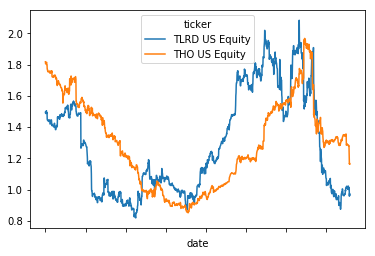

In [35]:
betas[['TLRD US Equity', 'THO US Equity']].plot()

In [47]:
beta = betas[-1:].T.reset_index(); beta.columns = ['ticker', 'beta']
data = data.groupby(level = 'ticker').last().reset_index()\
    .loc[:, ['ticker', 'PX_LAST', 'BOOK_VAL_PER_SH', 'IS_EPS', 'IS_DIV_PER_SHR']]

data = pd.merge(data, beta, on = 'ticker').set_index('ticker')
data

,PX_LAST,BOOK_VAL_PER_SH,IS_EPS,IS_DIV_PER_SHR,beta
ticker,,,,,
AE US Equity,40.4000,35.5710,0.8600,0.2200,0.838410
AMOT US Equity,46.5000,10.0818,0.4600,0.0250,0.879215
ARD US Equity,16.0000,-5.4465,0.2500,0.1400,0.544335
ATVI US Equity,78.0000,13.5745,0.5300,0.3400,1.485737
BCO US Equity,64.9500,4.3811,-2.1100,0.1500,0.751937
BHGE US Equity,30.9100,12.5555,-0.0500,0.1800,0.933161
BJRI US Equity,68.3700,14.0526,0.8100,0.1100,0.861440
CCO US Equity,6.1500,-6.1283,-0.1400,0.0000,0.972044
CCOI US Equity,51.2500,-2.4683,0.1500,0.5200,0.773374


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


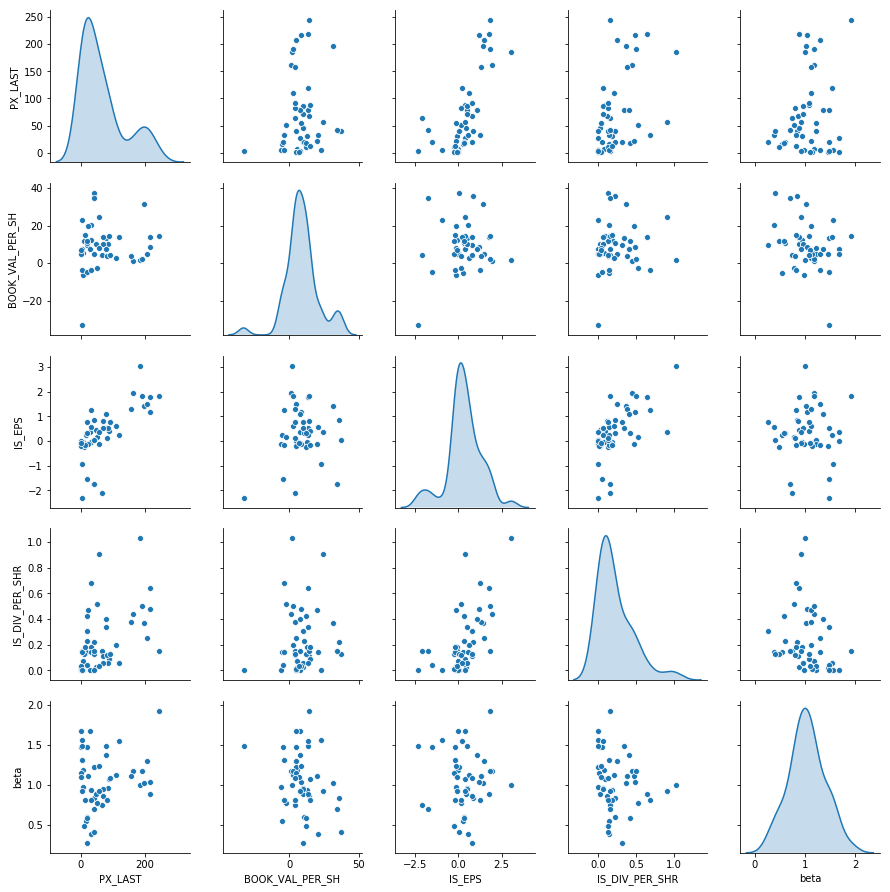

In [31]:
sns.pairplot(data, diag_kind = 'kde')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


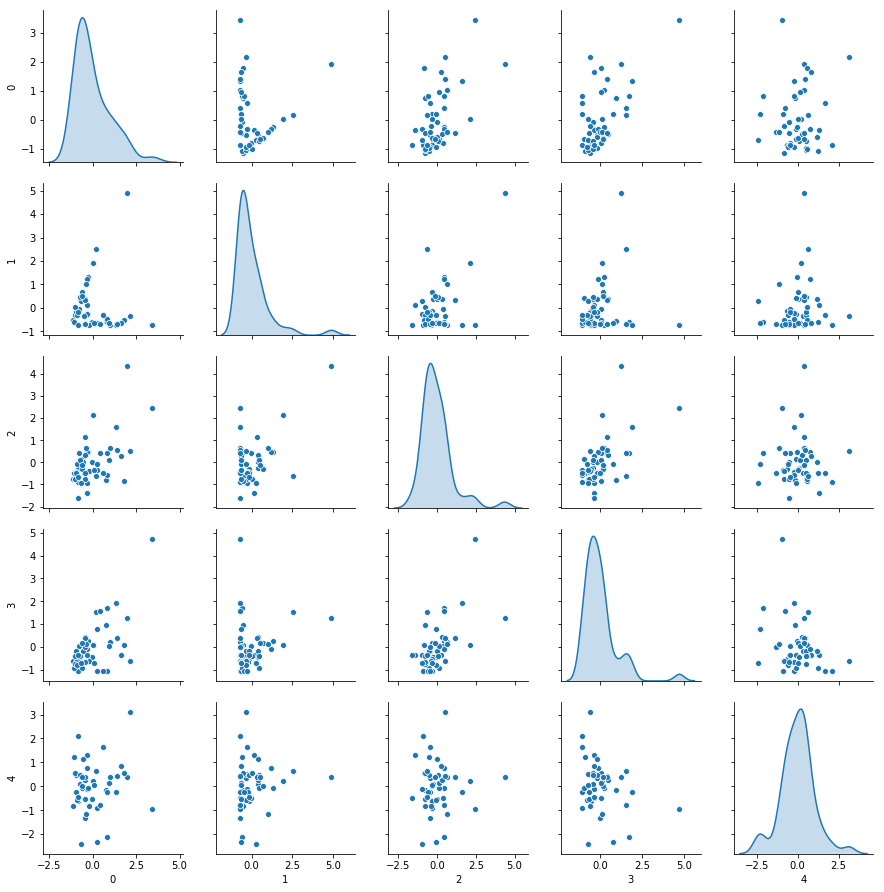

In [23]:
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data)

sns.pairplot(pd.DataFrame(data_scaled), diag_kind = 'kde')

In [48]:
interactions = data.loc[:, ['BOOK_VAL_PER_SH', 'IS_EPS']].apply(lambda var: data.loc[:, 'PX_LAST'] / var, axis = 0)

interactions = pd.merge(interactions, 
                        data.loc[:, ['IS_DIV_PER_SHR']].apply(lambda var: var / data.loc[:, 'PX_LAST'], axis = 0),
                       left_index = True, right_index = True)
interactions.columns = ['price / book', 'price / earnings', 'dividend yield']
interactions

,price / book,price / earnings,dividend yield
ticker,,,
AE US Equity,1.135757,46.976744,0.005446
AMOT US Equity,4.612272,101.086957,0.000538
ARD US Equity,-2.937666,64.000000,0.008750
ATVI US Equity,5.746068,147.169811,0.004359
BCO US Equity,14.825044,-30.781991,0.002309
BHGE US Equity,2.461869,-618.200000,0.005823
BJRI US Equity,4.865292,84.407407,0.001609
CCO US Equity,-1.003541,-43.928571,0.000000
CCOI US Equity,-20.763278,341.666667,0.010146


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


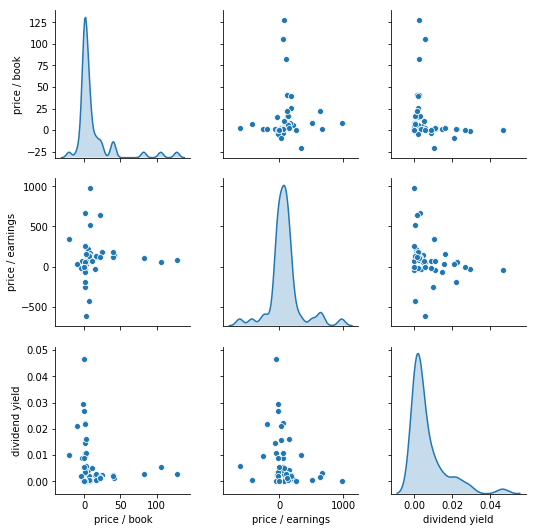

In [33]:
sns.pairplot(pd.DataFrame(interactions), diag_kind = 'kde')

Text(0,0.5,'Cluster distance')

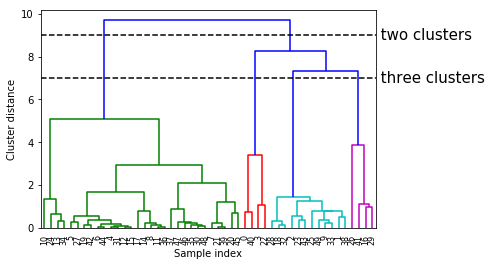

In [26]:
from sklearn.preprocessing import StandardScaler
interactions_scaled = StandardScaler().fit_transform(interactions)

from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(interactions_scaled)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [9, 9], '--', c='k')
ax.plot(bounds, [7, 7], '--', c='k')
ax.text(bounds[1], 9, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 7, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [49]:
workbook = pd.ExcelFile('../data-raw/categories.xlsx')

data = pd.merge(interactions,
                pd.read_excel(workbook, skiprows = 0, sheet_name  = 'RAY Index').set_index('ticker').loc[:, ['category']],
                left_index = True, right_index = True)

,price / book,price / earnings,dividend yield,category
ticker,,,,
AE US Equity,1.135757,46.976744,0.005446,value
AMOT US Equity,4.612272,101.086957,0.000538,growth
ARD US Equity,-2.937666,64.000000,0.008750,value
ATVI US Equity,5.746068,147.169811,0.004359,growth
BCO US Equity,14.825044,-30.781991,0.002309,growth
BHGE US Equity,2.461869,-618.200000,0.005823,value
BJRI US Equity,4.865292,84.407407,0.001609,growth
CCO US Equity,-1.003541,-43.928571,0.000000,value
CCOI US Equity,-20.763278,341.666667,0.010146,growth


In [56]:
# data.loc[:, 'price / book':'dividend yield']
data.loc[:, ['category']]

,category
ticker,
AE US Equity,value
AMOT US Equity,growth
ARD US Equity,value
ATVI US Equity,growth
BCO US Equity,growth
BHGE US Equity,value
BJRI US Equity,growth
CCO US Equity,value
CCOI US Equity,growth


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, 'price / book':'dividend yield'], 
                                                    data.loc[:, ['category']], random_state = 0)

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
print("k nearest neighbors training set accuracy: {:.3f}".format(clf.score(X_train, y_train)))
print("k nearest neighbors test set accuracy: {:.3f}".format(clf.score(X_test, y_test)))

logreg = LogisticRegression(C = 1000).fit(X_train, y_train)
print("logreg training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("logreg test set score: {:.3f}".format(logreg.score(X_test, y_test)))

svc = LinearSVC().fit(X_train, y_train)
print("svc training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("svc test set score: {:.3f}".format(svc.score(X_test, y_test)))

logreg = LogisticRegression(C = 1, penalty = "l1").fit(X_train, y_train)
print("logreg l1 training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("logreg l1 test set score: {:.3f}".format(logreg.score(X_test, y_test)))

logreg = LogisticRegression(C = 1, penalty = "l2").fit(X_train, y_train)
print("logreg l2 training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("logreg l2 test set score: {:.3f}".format(logreg.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth = 1, random_state = 0)
tree.fit(X_train, y_train)
print("decision tree training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("decision tree test set score: {:.3f}".format(tree.score(X_test, y_test)))


k nearest neighbors training set accuracy: 0.944
k nearest neighbors test set accuracy: 0.750
logreg training set score: 0.861
logreg test set score: 0.833
svc training set score: 0.917
svc test set score: 0.833
logreg l1 training set score: 0.889
logreg l1 test set score: 0.833
logreg l2 training set score: 0.889
logreg l2 test set score: 0.833
decision tree training set score: 0.972
decision tree test set score: 1.000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Index(['price / book', 'price / earnings', 'dividend yield'], dtype='object')

In [95]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file = "../plot/tree.dot", class_names = ["value", "growth"],
                feature_names = data.loc[:, 'price / book':'dividend yield'].columns, 
                impurity = False, filled = True)

with open("../plot/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


forest = RandomForestClassifier(n_estimators = 5, random_state = 0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1, learning_rate = 0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

svm = SVC(kernel = 'rbf', C = 100, gamma = 0.01).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))


Accuracy on training set: 0.972
Accuracy on test set: 1.000
Accuracy on training set: 0.972
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 0.833


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: __init__() got an unexpected keyword argument 'algorithm'